# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [2]:
import pandas as pd
import numpy as np

In [19]:
cols=['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE']
types={'household_key': 'int16', 'DAY': 'int16', 'QUANTITY': 'int32', 'SALES_VALUE': 'float32', 'PRODUCT_ID': 'int32'}
tx = pd.read_csv('../project_data/project_transactions.csv', usecols=cols, dtype=(types))


In [21]:
tx.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


In [22]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int16  
 1   BASKET_ID      int64  
 2   DAY            int16  
 3   PRODUCT_ID     int32  
 4   QUANTITY       int32  
 5   SALES_VALUE    float32
dtypes: float32(1), int16(2), int32(2), int64(1)
memory usage: 49.1 MB


In [75]:
# Use the following snippet to create a Date Column.

tx = (
    tx
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(tx["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

tx.describe()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
count,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2146311
mean,1.056232e+03,3.404897e+10,2.884715e+06,1.009703e+02,3.105908e+00,2017-01-23 12:08:29.287610368
min,1.000000e+00,2.698490e+10,2.567100e+04,0.000000e+00,0.000000e+00,2016-01-01 00:00:00
25%,5.480000e+02,3.040798e+10,9.172310e+05,1.000000e+00,1.290000e+00,2016-08-16 00:00:00
50%,1.042000e+03,3.281176e+10,1.027960e+06,1.000000e+00,2.000000e+00,2017-01-26 00:00:00
75%,1.581000e+03,4.012804e+10,1.132771e+06,1.000000e+00,3.490000e+00,2017-07-08 00:00:00
max,2.099000e+03,4.230536e+10,1.831630e+07,8.963800e+04,8.400000e+02,2017-12-11 00:00:00
std,6.050059e+02,4.723748e+09,3.831949e+06,1.152364e+03,4.186300e+00,NaN


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

<Axes: xlabel='date'>

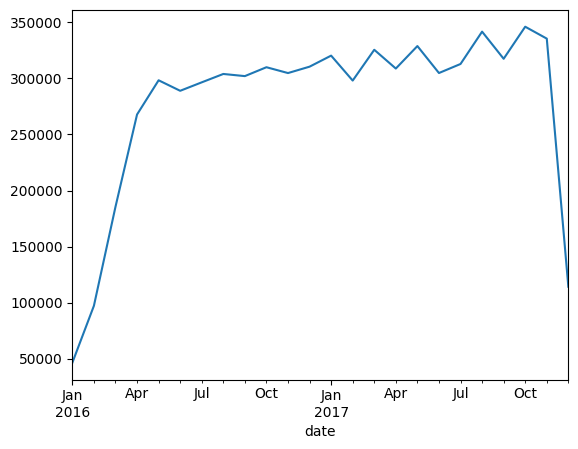

In [77]:
# df = tx.groupby([tx.date.dt.year, tx.date.dt.month]).sum('SALES_VALUE')['SALES_VALUE']
df = tx.set_index('date').loc[:, 'SALES_VALUE'].resample('ME').sum()
df.plot()

In [78]:
# df = df.reset_index(allow_duplicates=True)
# df.columns = ['year', 'month', 'SALES_VALUE']
dates = ((df.year == 2016) & (df.month >= 4)) | ((df.year == 2017) & (df.month <= 10))
df[dates].groupby([df.year, df.month]).sum()['SALES_VALUE'].plot()

AttributeError: 'Series' object has no attribute 'year'

<Axes: xlabel='month'>

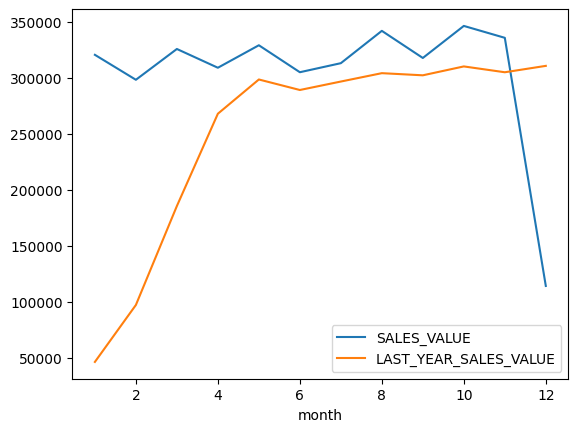

In [137]:
(df
.assign(LAST_YEAR_SALES_VALUE = df['SALES_VALUE']
.shift(12))[df.year == 2017]
[['month', 'SALES_VALUE', 'LAST_YEAR_SALES_VALUE']]
.plot(x='month'))

<Axes: xlabel='Day of week', ylabel='Sales'>

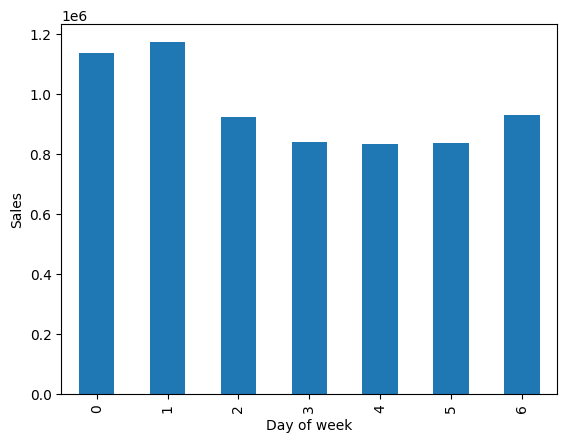

In [146]:
tx.groupby([tx.date.dt.dayofweek]).sum('SALES_VALUE')['SALES_VALUE'].plot.bar(xlabel="Day of week", ylabel="Sales")

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [29]:
cols=['AGE_DESC', 'INCOME_DESC', 'household_key', 'HH_COMP_DESC']
types={'household_key': 'int16', 'AGE_DESC': 'category', 'INCOME_DESC': 'category', 'HH_COMP_DESC': 'category'}

demo = (pd
.read_csv('../project_data/hh_demographic.csv', 
            usecols=cols, 
            dtype=(types)
            )
)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int16   
dtypes: category(3), int16(1)
memory usage: 4.9 KB


In [30]:
demo.sample(10)

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
431,65+,50-74K,2 Adults No Kids,1318
298,35-44,35-49K,2 Adults No Kids,883
744,19-24,Under 15K,Single Female,2318
337,45-54,75-99K,Single Male,997
467,35-44,Under 15K,2 Adults No Kids,1445
542,35-44,150-174K,Single Male,1710
271,25-34,75-99K,2 Adults No Kids,803
290,45-54,15-24K,1 Adult Kids,866
563,19-24,35-49K,Single Female,1796
760,45-54,25-34K,2 Adults No Kids,2364


In [24]:
sales_by_household = tx.groupby('household_key').sum('SALES_VALUE')
sales_by_household.head()

,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
household_key,,,,,
1,59011300789841,680479,5274477372,1997,4330.160156
2,24211166961791,274035,2138870077,834,1954.339966
3,29353603004438,281292,2513054814,8540,2653.209961
4,9456388695009,81612,813525920,382,1200.109985
5,6962167980793,61087,677228224,245,779.059998


In [83]:
merged = pd.merge(left=demo, right=tx, how='inner', on='household_key')
merged.sample(10)

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
875540,55-64,35-49K,Single Female,1568,41351685154,1105535,1,3.99,2017-10-01
847943,25-34,50-74K,2 Adults No Kids,1527,34103761508,1029743,1,2.32,2017-04-23
991848,65+,35-49K,2 Adults No Kids,1804,29712411061,7432861,1,1.13,2016-07-14
769216,35-44,100-124K,2 Adults Kids,1388,33118903062,865511,1,2.99,2017-02-18
271755,55-64,35-49K,Single Male,454,30037101020,826249,1,0.79,2016-07-28
910236,35-44,Under 15K,Single Female,1653,32730465247,8090565,1,2.50,2017-01-19
257251,35-44,35-49K,2 Adults Kids,418,41366483978,989069,1,2.00,2017-10-02
564201,35-44,50-74K,2 Adults Kids,973,40374332965,947019,1,4.29,2017-07-26
42108,25-34,150-174K,2 Adults Kids,58,35144100991,916758,1,4.49,2017-05-28
341513,35-44,100-124K,2 Adults Kids,601,33906227852,1137688,1,1.22,2017-04-08


<Axes: xlabel='AGE_DESC'>

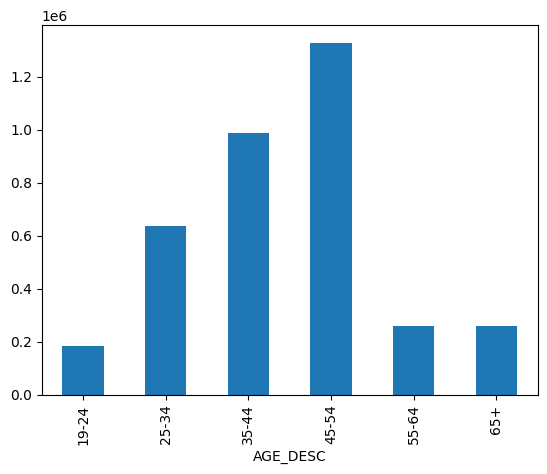

In [84]:
merged.groupby('AGE_DESC', observed=False).sum('SALES_VALUE')['SALES_VALUE'].plot.bar()

<Axes: xlabel='INCOME_DESC'>

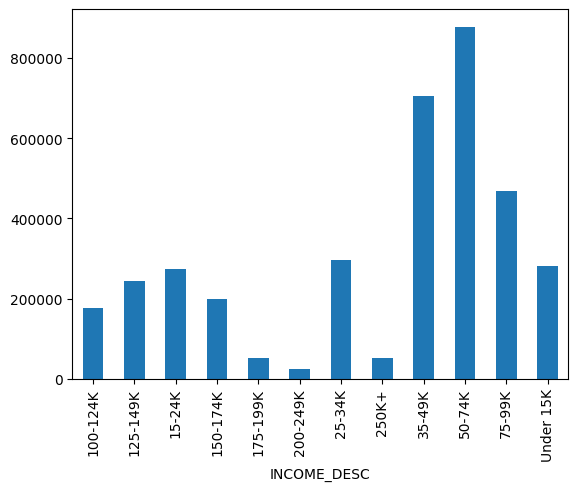

In [85]:
merged.groupby('INCOME_DESC', observed=False).sum('SALES_VALUE')['SALES_VALUE'].plot.bar()

In [91]:
# Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?
merged.pivot_table(index='AGE_DESC', values='SALES_VALUE', aggfunc='sum', columns='HH_COMP_DESC').style.background_gradient(cmap="RdYlGn", axis=1)

/tmp/ipykernel_225/2855514071.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  merged.pivot_table(index='AGE_DESC', values='SALES_VALUE', aggfunc='sum', columns='HH_COMP_DESC').style.background_gradient(cmap="RdYlGn", axis=1)


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,21806.390625,43431.558594,60312.000000,41184.859375,6433.669922,9822.549805
25-34,88195.148438,212897.015625,135324.375000,81726.492188,103099.968750,14712.540039
35-44,56679.640625,354663.937500,281718.562500,174440.562500,72662.882812,46504.609375
45-54,79590.828125,323913.750000,432125.000000,168326.515625,111279.289062,213135.812500
55-64,3064.869873,28173.929688,109295.859375,62609.929688,31380.369141,23921.250000
65+,4040.810059,16610.599609,129195.039062,69014.890625,38715.558594,2879.290039


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [50]:
prod = pd.read_csv("../project_data/product.csv", usecols=['PRODUCT_ID', 'DEPARTMENT'], dtype=({'PRODUCT_ID': 'int32', 'DEPARTMENT': 'category'}))
prod.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [60]:
tx_prod = pd.merge(left=tx, right=prod, how='inner', on='PRODUCT_ID')
tx_prod.head()


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,DEPARTMENT
0,1364,26984896261,1,842930,1,2.19,GROCERY
1,1364,26984896261,1,897044,1,2.99,GROCERY
2,1364,26984896261,1,920955,1,3.09,MEAT
3,1364,26984896261,1,937406,1,2.50,MEAT-PCKGD
4,1364,26984896261,1,981760,1,0.60,GROCERY


In [89]:
tx_prod_demo = pd.merge(left=tx_prod, right=demo, how='inner', on='household_key')
tx_prod_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   household_key  1161575 non-null  int16   
 1   BASKET_ID      1161575 non-null  int64   
 2   DAY            1161575 non-null  int16   
 3   PRODUCT_ID     1161575 non-null  int32   
 4   QUANTITY       1161575 non-null  int32   
 5   SALES_VALUE    1161575 non-null  float32 
 6   DEPARTMENT     1161575 non-null  category
 7   AGE_DESC       1161575 non-null  category
 8   INCOME_DESC    1161575 non-null  category
 9   HH_COMP_DESC   1161575 non-null  category
dtypes: category(4), float32(1), int16(2), int32(2), int64(1)
memory usage: 31.0 MB


In [90]:
pvt = tx_prod_demo.pivot_table(index='DEPARTMENT', columns='AGE_DESC', values='SALES_VALUE', aggfunc='sum')
pvt.style.background_gradient(cmap="RdYlGn", axis=1)

/tmp/ipykernel_225/1320027405.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = tx_prod_demo.pivot_table(index='DEPARTMENT', columns='AGE_DESC', values='SALES_VALUE', aggfunc='sum')


AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.639999,21.250000,72.580002,55.919998,0.000000,16.369999
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300003,134.160004,348.529999,418.239990,80.860001,149.240005
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630005,2273.030029,4362.020020,5187.569824,986.260010,600.900024
COUP/STR & MFG,7.490000,48.419998,121.200005,154.550003,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300049,18181.939453,34577.289062,44334.218750,9850.540039,10462.330078


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [73]:
pvt.to_csv('tx_prod_demo.csv')